In [1]:
cd ..

/Users/jwen/Stanford/projects/smoke_segmentation


In [2]:
cd src

/Users/jwen/Stanford/projects/smoke_segmentation/src


In [291]:
#from metrics import lovasz as lov_loss
import torch
import time
import numpy as np

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from utils.data_set import WildfireSmokeDataset
from utils import data_vis
from utils import augmentation as aug
from matplotlib import pyplot as plt

%matplotlib inline

In [257]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in data

In [314]:
train_dataset = WildfireSmokeDataset('../data/crops/file_index.csv', 
                     root_dir='crops',train_val_test='train', 
                                     #bands=['true_color','C07','C11'], 
                                     bands=['true_color'], 
                                     #transform=None)
                                     transform=transforms.Compose([aug.ToTensorTarget()]))

In [315]:
train_loader = DataLoader(train_dataset, batch_size=4, num_workers=0, shuffle=True)

In [316]:
blah = next(iter(train_loader))

In [317]:
blah['map_img'].shape

torch.Size([4, 1, 300, 300])

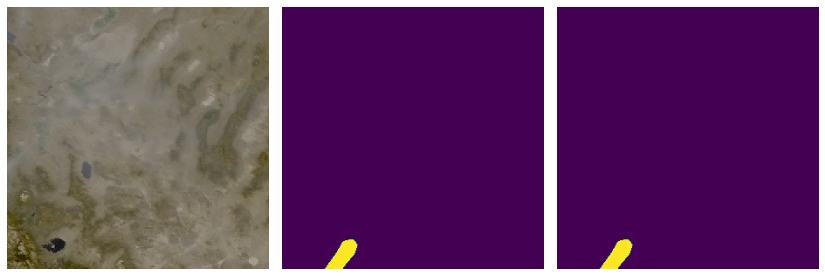

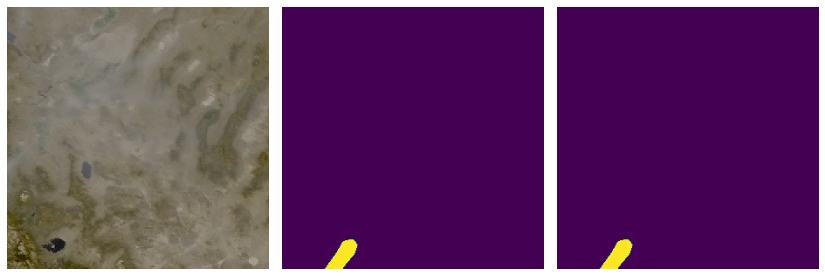

In [321]:
data_vis.show_tensorboard_image(blah['sat_img'], blah['map_img'], blah['map_img'])

In [52]:
zing = io.imread('../data/crops/train/true_color_G16_doy321_s201811172357_e201811172359_7.png')
blah = io.imread('../data/crops/train/C07_G16_doy321_s201811172357_e201811172359_7.png')

In [57]:
np.dstack([zing, blah[:,:,0], blah[:,:,0]]).shape

(300, 300, 5)

In [267]:
blah = train_dataset[0]['map_img']

In [264]:
transforms.functional.to_tensor(blah)

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [268]:
blah.shape

torch.Size([3, 300, 300])

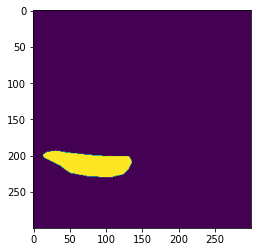

In [278]:
plt.imshow(blah[2,:,:].cpu().numpy())